<a href="https://colab.research.google.com/github/Hjarrar14/Car-Insurance/blob/main/Car_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and Inspect Data

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/Week17/Data/Car_Insurance_Claim.csv')
df =df.set_index('ID')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.63,1.00,after 2015,0.00,1.00,10238,"12,000.00",sedan,0,0,0,0.00
750365,16-25,male,majority,0-9y,none,poverty,0.36,0.00,before 2015,0.00,0.00,10238,"16,000.00",sedan,0,0,0,1.00
199901,16-25,female,majority,0-9y,high school,working class,0.49,1.00,before 2015,0.00,0.00,10238,"11,000.00",sedan,0,0,0,0.00
478866,16-25,male,majority,0-9y,university,working class,0.21,1.00,before 2015,0.00,1.00,32765,"11,000.00",sedan,0,0,0,0.00
731664,26-39,male,majority,10-19y,none,working class,0.39,1.00,before 2015,0.00,0.00,32765,"12,000.00",sedan,2,0,1,1.00


- What is the target?
  - The target is OUTCOME.
- What does one row represent?
  - The row represent a person.
- How many features does the data have?
  - 19
- How many rows are in the dataset?
  - There are 10000 rows in the dataset.
- What opportunities exist for dimensionality reduction or feature selection with this dataset?
  - The number of features is relatively small, with only 19 features available. However, there is a slight opportunity for dimensionality reduction.

- What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - There is no data dictionary provided for this dataset, which may cause some difficulty in fully understanding the features.

## Clean Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null

In [ ]:
# Check for duplicated
duplicated = df.duplicated(keep=False)
duplicated.sum()

np.int64(23)

In [ ]:
# Check if there Missing Values
df.isna().sum().sum()

np.int64(1939)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null

In [ ]:
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,"9,018.00","10,000.00","10,000.00","10,000.00","10,000.00","9,043.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,0.52,0.70,0.50,0.69,"19,864.55","11,697.00",1.48,0.24,1.06,0.31
std,0.14,0.46,0.50,0.46,"18,915.61","2,818.43",2.24,0.55,1.65,0.46
min,0.05,0.00,0.00,0.00,"10,238.00","2,000.00",0.00,0.00,0.00,0.00
25%,0.42,0.00,0.00,0.00,"10,238.00","10,000.00",0.00,0.00,0.00,0.00
50%,0.53,1.00,0.00,1.00,"10,238.00","12,000.00",0.00,0.00,0.00,0.00
75%,0.62,1.00,1.00,1.00,"32,765.00","14,000.00",2.00,0.00,2.00,1.00
max,0.96,1.00,1.00,1.00,"92,101.00","22,000.00",22.00,6.00,15.00,1.00


In [ ]:
df['CREDIT_SCORE'].head()

,CREDIT_SCORE
ID,
569520,0.63
750365,0.36
199901,0.49
478866,0.21
731664,0.39


In [ ]:
df[df['CREDIT_SCORE']<.2]

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
496987,16-25,male,majority,0-9y,none,poverty,0.17,1.00,before 2015,1.00,1.00,10238,"9,000.00",sedan,0,0,0,0.00
431538,16-25,male,majority,0-9y,high school,poverty,0.19,0.00,before 2015,1.00,0.00,10238,"12,000.00",sports car,0,0,0,1.00
112143,16-25,female,majority,0-9y,none,working class,0.19,0.00,before 2015,0.00,1.00,32765,"11,000.00",sedan,0,0,0,1.00
124204,16-25,female,majority,0-9y,none,poverty,0.19,0.00,before 2015,0.00,0.00,10238,"17,000.00",sedan,0,0,0,1.00
232470,16-25,male,majority,0-9y,university,poverty,0.13,1.00,before 2015,0.00,1.00,10238,"14,000.00",sedan,0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41325,40-64,male,majority,20-29y,high school,poverty,0.12,0.00,before 2015,0.00,0.00,32765,"16,000.00",sedan,2,0,0,1.00
968926,16-25,male,majority,0-9y,high school,poverty,0.15,1.00,before 2015,0.00,0.00,10238,"16,000.00",sedan,0,0,0,0.00
981972,16-25,male,minority,0-9y,high school,poverty,0.13,0.00,after 2015,0.00,0.00,32765,"14,000.00",sedan,0,0,0,0.00


<Axes: xlabel='CREDIT_SCORE'>

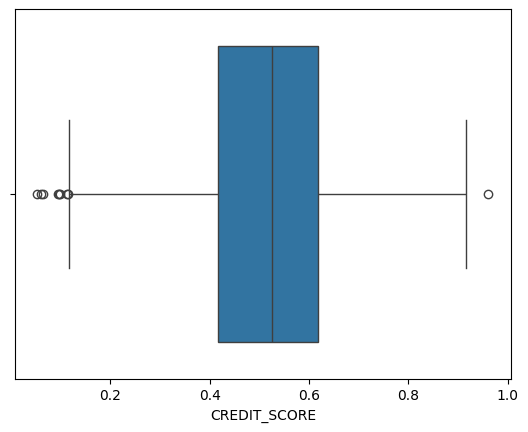

In [ ]:
sns.boxplot(df,x='CREDIT_SCORE')

<Axes: xlabel='ANNUAL_MILEAGE'>

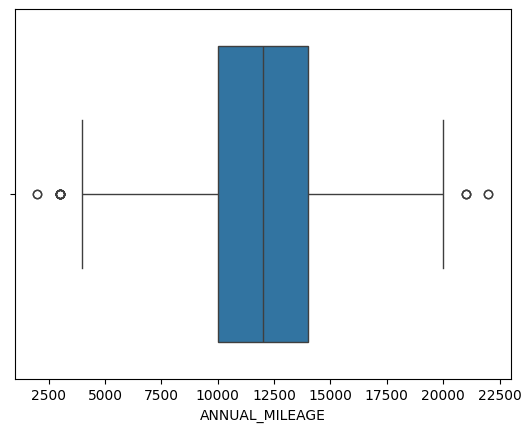

In [ ]:
sns.boxplot(df,x='ANNUAL_MILEAGE')

In [ ]:
# We will impute the missing values using the median, because the data is dispersed and contains outliers.

In [ ]:
Na_median =['ANNUAL_MILEAGE','CREDIT_SCORE']

In [ ]:
# Fill missing values
for col in Na_median:
  df[col] = df[col].fillna(df[col].median())
df.isna().sum()

,0
AGE,0
GENDER,0
RACE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0
CREDIT_SCORE,0
VEHICLE_OWNERSHIP,0
VEHICLE_YEAR,0
MARRIED,0


In [ ]:
#  Check for and address any inconsistent values in categorical columns.

In [ ]:
obj_col = df.select_dtypes('object')

In [ ]:
for col in obj_col:
  print(f'the value counts for {col}')
  # print the value counts for the column
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

the value counts for AGE
AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64


the value counts for GENDER
GENDER
female    5010
male      4990
Name: count, dtype: int64


the value counts for RACE
RACE
majority    9012
minority     988
Name: count, dtype: int64


the value counts for DRIVING_EXPERIENCE
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64


the value counts for EDUCATION
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64


the value counts for INCOME
INCOME
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: count, dtype: int64


the value counts for VEHICLE_YEAR
VEHICLE_YEAR
before 2015    6967
after 2015     3033
Name: count, dtype: int64


the value counts for VEHICLE_TYPE
VEHICLE_TYPE
sedan         9523
sports car     477
Name: count, dtype: int64




In [ ]:
# So we don't have any inconsistent values that need to be fixed in Categorical values.

In [ ]:
# Check for and address any impossible values in numeric columns.

In [ ]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

In [ ]:
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,0.52,0.70,0.50,0.69,"19,864.55","11,726.00",1.48,0.24,1.06,0.31
std,0.13,0.46,0.50,0.46,"18,915.61","2,681.65",2.24,0.55,1.65,0.46
min,0.05,0.00,0.00,0.00,"10,238.00","2,000.00",0.00,0.00,0.00,0.00
25%,0.43,0.00,0.00,0.00,"10,238.00","10,000.00",0.00,0.00,0.00,0.00
50%,0.53,1.00,0.00,1.00,"10,238.00","12,000.00",0.00,0.00,0.00,0.00
75%,0.61,1.00,1.00,1.00,"32,765.00","13,000.00",2.00,0.00,2.00,1.00
max,0.96,1.00,1.00,1.00,"92,101.00","22,000.00",22.00,6.00,15.00,1.00


In [ ]:
# So we don't have any inconsistent values that need to be fixed in Numerical values.

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax,
                hue=x,order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"\n- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"\n- NaN's Found: {null_count} ({round(null_perc,2)}%)")


## Exploratory Visualizations for numeric data

### Univariate Visualizations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       10000 non-null  float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null

In [ ]:
numerical_features = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS','DUIS', 'PAST_ACCIDENTS']

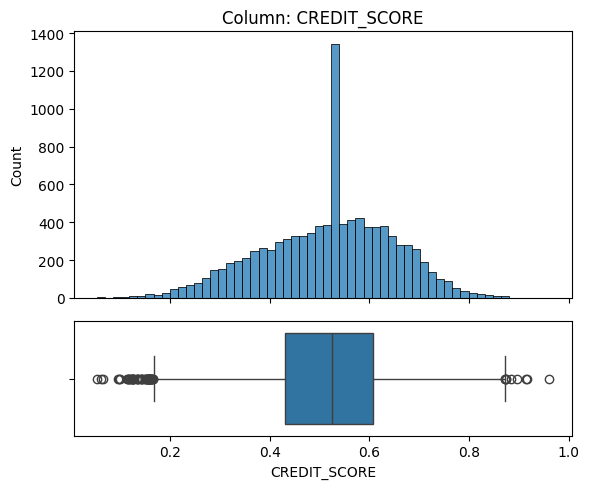


- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df,x='CREDIT_SCORE')

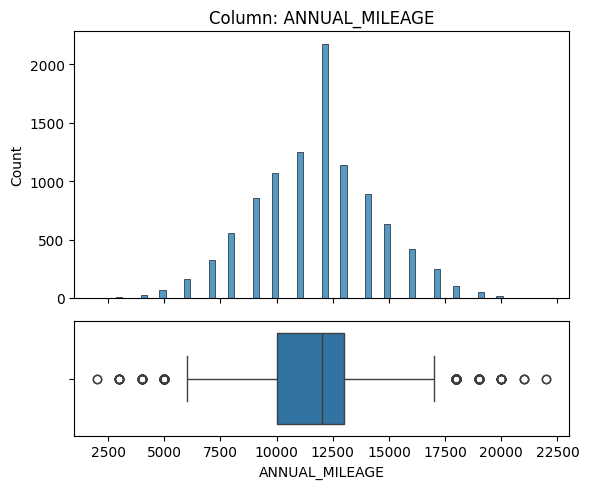


- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df,x='ANNUAL_MILEAGE')

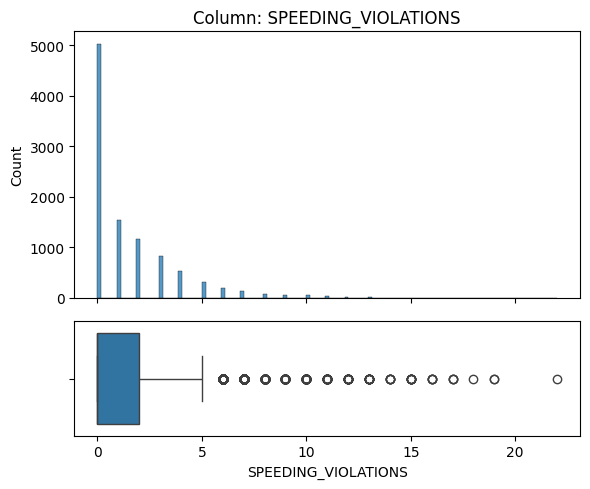


- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df,x='SPEEDING_VIOLATIONS')

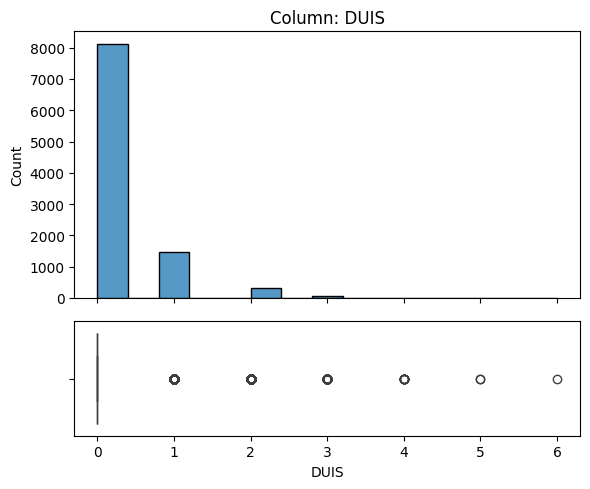


- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df,x='DUIS')

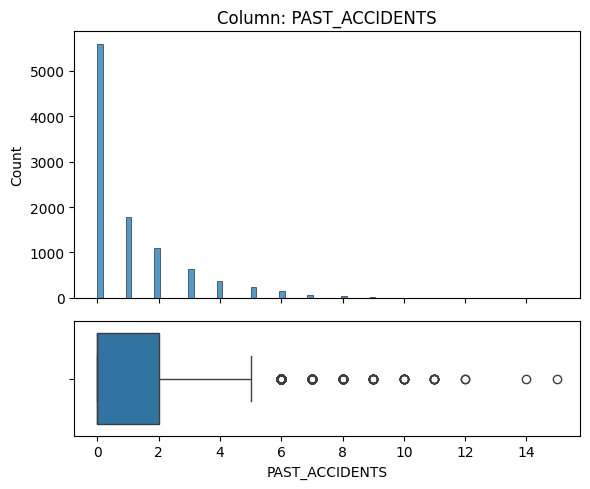


- NaN's Found: 0 (0.0%)


In [ ]:
explore_numeric(df,x='PAST_ACCIDENTS')

### Multivariate Visualizations

In [ ]:
def plot_categorical_vs_target(df,x,y='SalePrice',figsize=(6,4),
                               fillna = True, placeholder = 'MISSING',
                               order=None,target_type='reg'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Fillna with placeholder
  if fillna==True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  #or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df =temp_df.dropna(subset=[x])

  # Create the figure and subplots
  fig,ax = plt.subplots(figsize=figsize)

  # Regression-Target plot
  if target_type == 'reg': #Added if statement here
    # Barplot
    sns.barplot(data=temp_df,x=x,y=y,ax=ax,order=order,hue=x,alpha=0.6,
              linewidth=1,edgecolor='black',errorbar=None)

    # Boxplot
    sns.stripplot(data=temp_df,x=x,y=y,hue=x,ax=ax,
                order=order,hue_order=order,legend=False,
                edgecolor='white',linewidth=0.5,size=3,
                zorder=0)
  # Classification-Target plot # This is the new code for the calssification task
  elif target_type == 'class':
    ax = sns.histplot(data= temp_df ,hue=y ,x=x , stat='percent',multiple='fill')

    # Rotate xlabels
  ax.set_xticks(ax.get_xticks())# Added this to prevent a bug
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right')

    # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig,ax


In [ ]:
def plot_numeric_vs_target(df, x, y, figsize=(6,4),
                           target_type='reg', estimator='mean',
                           errorbar='ci',sorted=False,ascending=False,
                           **kwargs): # kwargs for sns.regplot

  nulls = df[[x,y]].isna().sum()
  if nulls.sum()>0:
    print(f"- Excluding {nulls.sum()} NaN's")
    # print(nulls)
    temp_df = df.dropna(subset=[x,y,])
  else:
    temp_df = df
  # Create the figure
  fig, ax = plt.subplots(figsize=figsize)

  # REGRESSION-TARGET PLOT
  if 'reg' in target_type:
    # Calculate the correlation
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    # Plot the data
    scatter_kws={'ec':'white','linewidths':1,'alpha':0.8}
    sns.regplot(data=temp_df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
    ## Add the title with the correlation
    ax.set_title(f"{x} vs. {y} (r = {r})")

  # CLASSIFICATION-TARGET PLOT
  elif 'class' in target_type:

    # Sort the groups by median/mean
    if sorted == True:

      if estimator == 'median':
        group_vals = temp_df.groupby(y)[x].median()
      elif estimator =='mean':
        group_vals = temp_df.groupby(y)[x].mean()

      ## Sort values
      group_vals = group_vals.sort_values(ascending=ascending)
      order = group_vals.index

    else:
      # Set order to None if not calcualted
      order = None


    # Left Subplot (barplot)
    sns.barplot(data=temp_df, x=y, y=x, order=order,  estimator=estimator,
                errorbar=errorbar, ax=ax, **kwargs)

    # Add title
    ax.set_title(f"{x} vs. {y}")

    # rotate xaxis labels
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


  # Final Adjustments & return
  fig.tight_layout()
  fig.show()
  return fig, ax

In [ ]:
numerical_features

['CREDIT_SCORE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

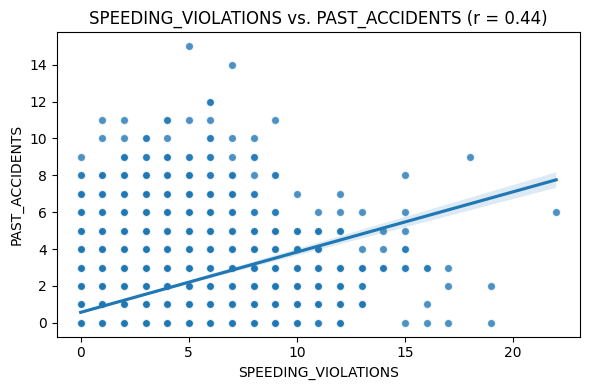

In [ ]:
plot_numeric_vs_target(df,x='SPEEDING_VIOLATIONS',y='PAST_ACCIDENTS',target_type='reg');

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'DUIS vs. SPEEDING_VIOLATIONS (r = 0.36)'}, xlabel='DUIS', ylabel='SPEEDING_VIOLATIONS'>)

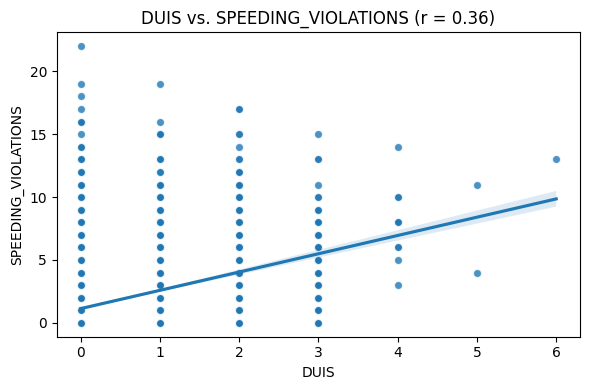

In [ ]:
plot_numeric_vs_target(df,x='DUIS',y='SPEEDING_VIOLATIONS',target_type='reg')

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'DUIS vs. PAST_ACCIDENTS (r = 0.26)'}, xlabel='DUIS', ylabel='PAST_ACCIDENTS'>)

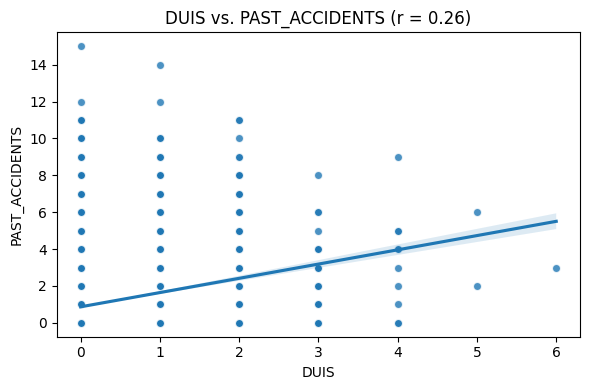

In [ ]:
plot_numeric_vs_target(df,x='DUIS',y='PAST_ACCIDENTS',target_type='reg')

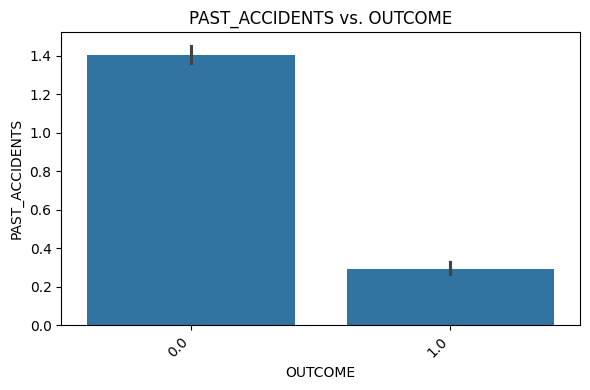

In [ ]:
plot_numeric_vs_target(df,x='PAST_ACCIDENTS',y='OUTCOME',target_type='class');

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'CREDIT_SCORE vs. OUTCOME'}, xlabel='OUTCOME', ylabel='CREDIT_SCORE'>)

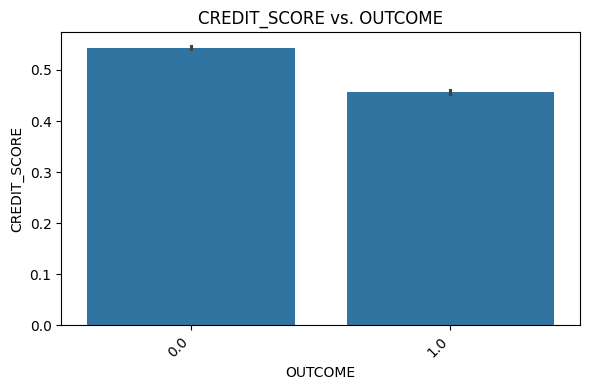

In [ ]:
plot_numeric_vs_target(df,x='CREDIT_SCORE',y='OUTCOME',target_type='class')

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'ANNUAL_MILEAGE vs. OUTCOME'}, xlabel='OUTCOME', ylabel='ANNUAL_MILEAGE'>)

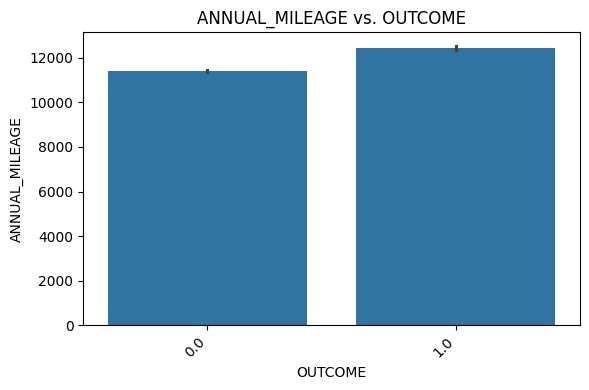

In [ ]:
plot_numeric_vs_target(df,x='ANNUAL_MILEAGE',y='OUTCOME',target_type='class')

In [ ]:
numerical_features

['CREDIT_SCORE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'SPEEDING_VIOLATIONS vs. OUTCOME'}, xlabel='OUTCOME', ylabel='SPEEDING_VIOLATIONS'>)

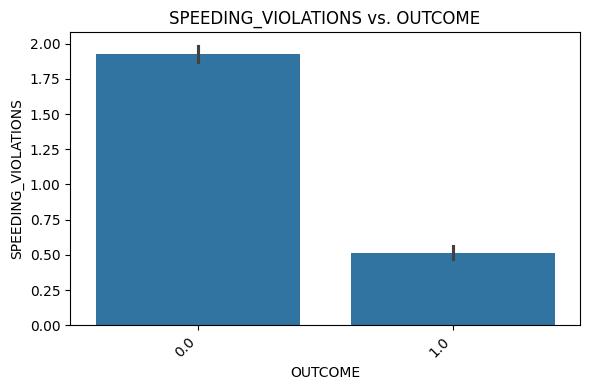

In [ ]:
plot_numeric_vs_target(df,x='SPEEDING_VIOLATIONS',y='OUTCOME',target_type='class')

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'PAST_ACCIDENTS vs. OUTCOME'}, xlabel='OUTCOME', ylabel='PAST_ACCIDENTS'>)

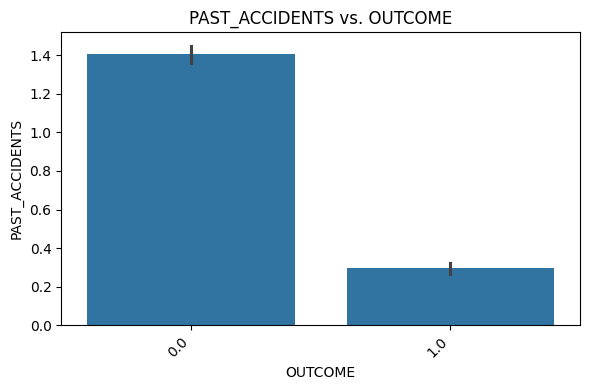

In [ ]:
plot_numeric_vs_target(df,x='PAST_ACCIDENTS',y='OUTCOME',target_type='class')

## Exploratory Visualizations for Categorical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         10000 non-null  float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       10000 non-null  float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non-null

### Univariate Visualizations

In [ ]:
categorical_features = ['AGE','RACE','GENDER','MARRIED','CHILDREN','VEHICLE_OWNERSHIP','POSTAL_CODE' ,'VEHICLE_YEAR', 'VEHICLE_TYPE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME','OUTCOME']

<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


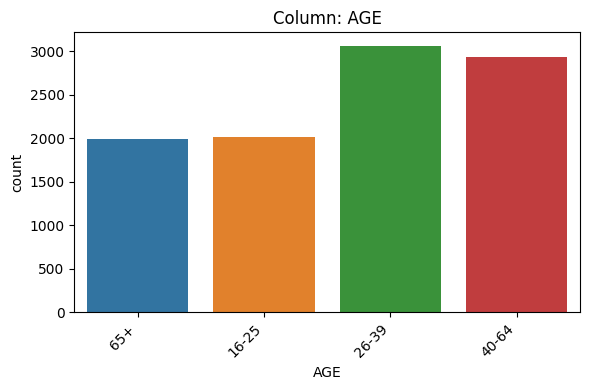

<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '26-39' occurs 3063 times (30.63%)
- Not constant or quasi-constant.


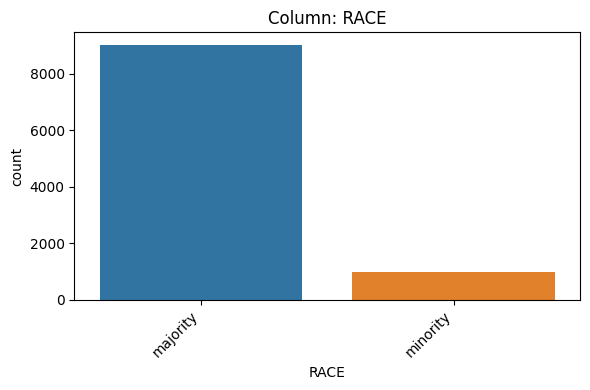


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'majority' occurs 9012 times (90.12%)
- Not constant or quasi-constant.


<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


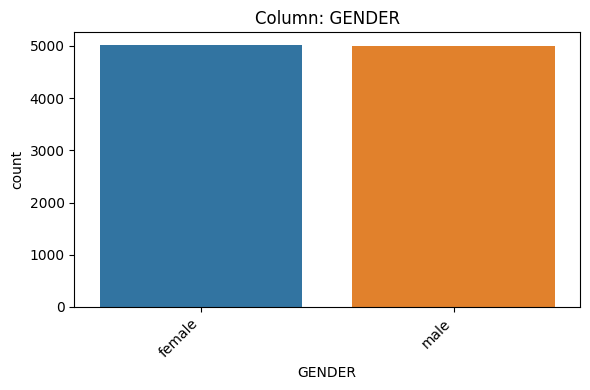


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'female' occurs 5010 times (50.1%)
- Not constant or quasi-constant.


<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


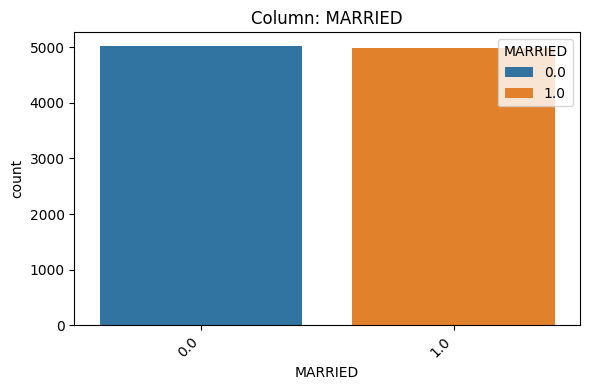


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0.0' occurs 5018 times (50.18%)
- Not constant or quasi-constant.


<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


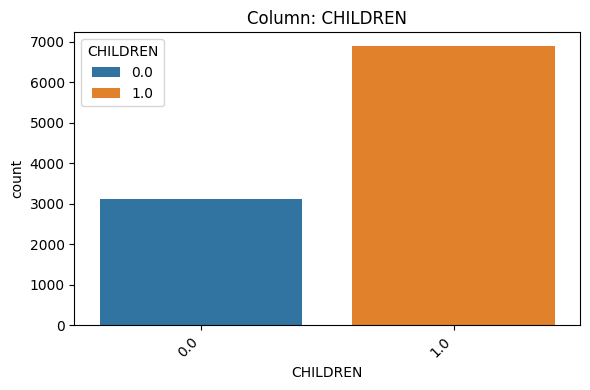

<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '1.0' occurs 6888 times (68.88%)
- Not constant or quasi-constant.


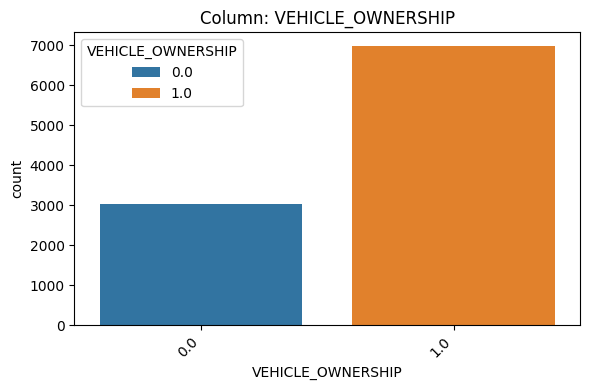


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '1.0' occurs 6970 times (69.7%)
- Not constant or quasi-constant.


<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


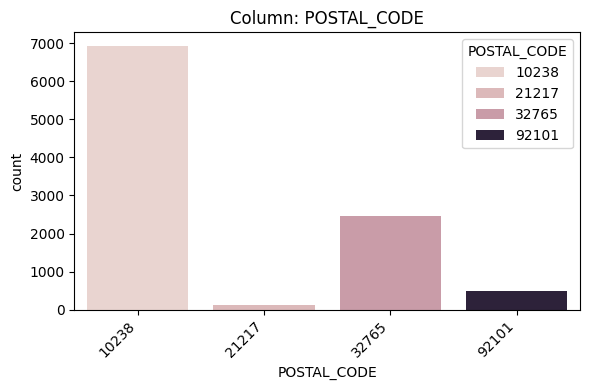


- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '10238' occurs 6940 times (69.4%)
- Not constant or quasi-constant.


<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


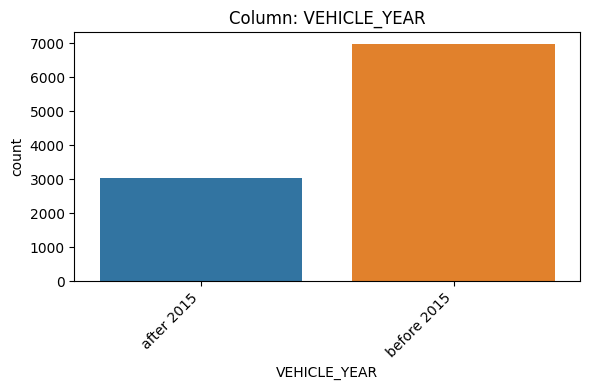


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'before 2015' occurs 6967 times (69.67%)
- Not constant or quasi-constant.


<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


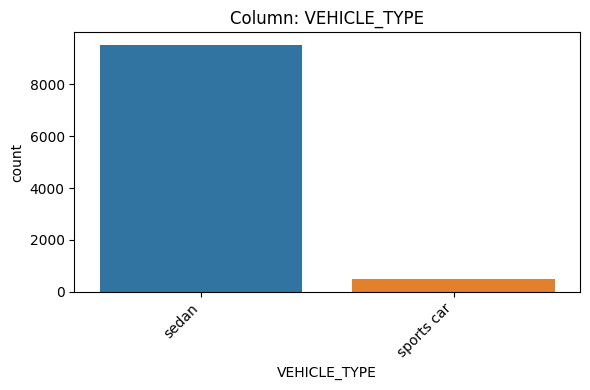


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'sedan' occurs 9523 times (95.23%)
- Not constant or quasi-constant.


<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


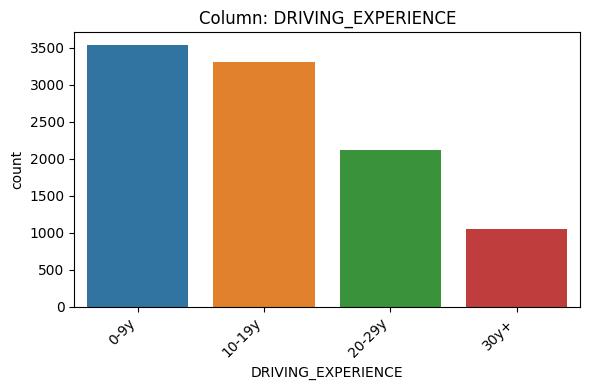

<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '0-9y' occurs 3530 times (35.3%)
- Not constant or quasi-constant.


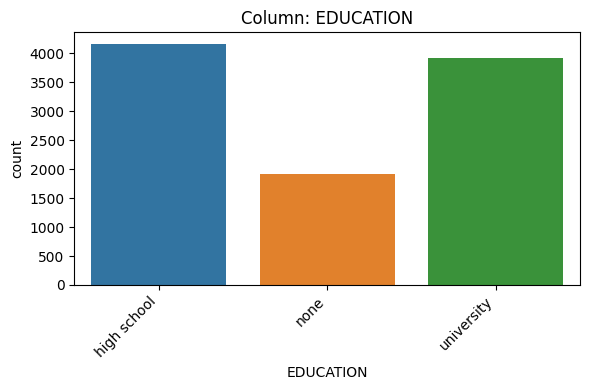

<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'high school' occurs 4157 times (41.57%)
- Not constant or quasi-constant.


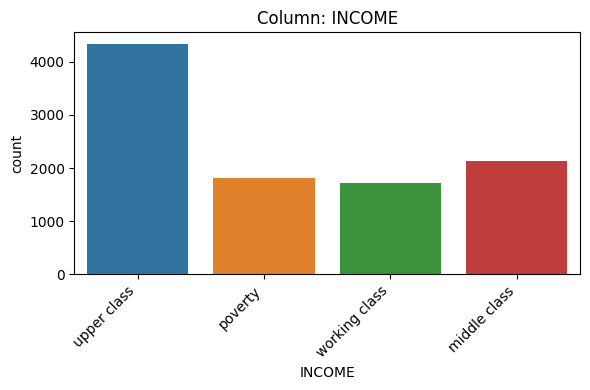


- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'upper class' occurs 4336 times (43.36%)
- Not constant or quasi-constant.


<ipython-input-95-0fc48c9a5592>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


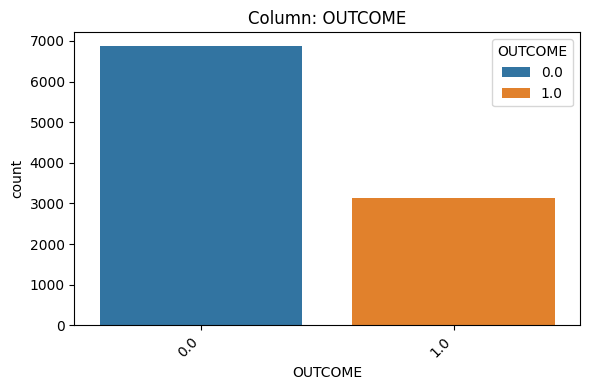


- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0.0' occurs 6867 times (68.67%)
- Not constant or quasi-constant.


In [ ]:
for i in categorical_features:
  explore_categorical(df,x=i);

In [ ]:
categorical_features

['AGE',
 'RACE',
 'GENDER',
 'MARRIED',
 'CHILDREN',
 'VEHICLE_OWNERSHIP',
 'POSTAL_CODE',
 'VEHICLE_YEAR',
 'VEHICLE_TYPE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'OUTCOME']

### Multivariate Feature vs. Target Functions.


In [168]:
df['VEHICLE_OWNERSHIP'].value_counts(1)

,proportion
VEHICLE_OWNERSHIP,
1.00,0.70
0.00,0.30


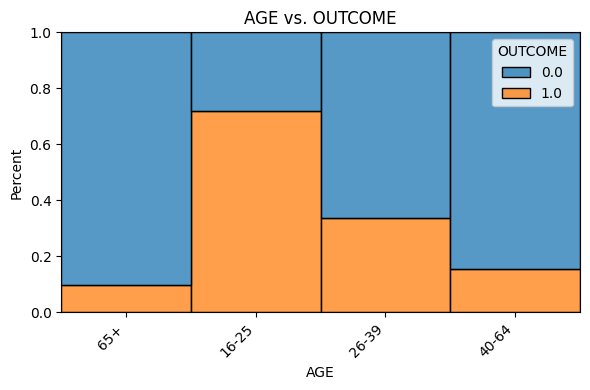

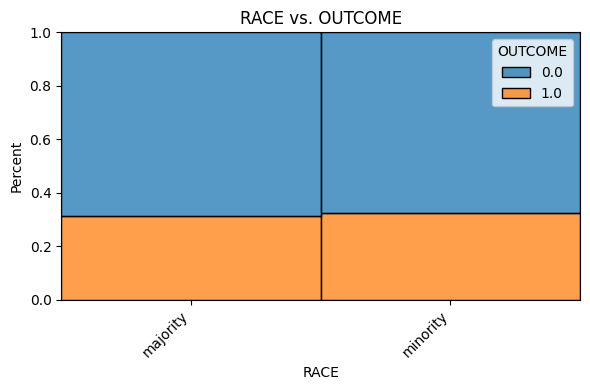

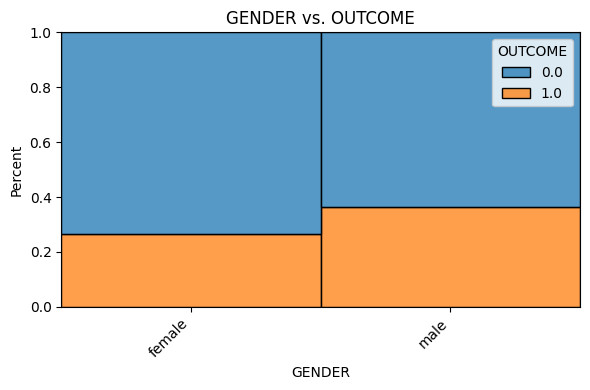

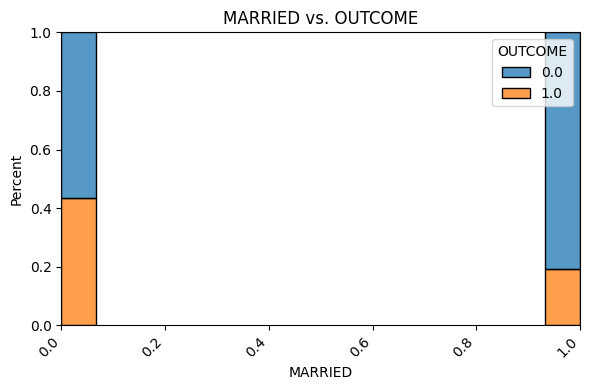

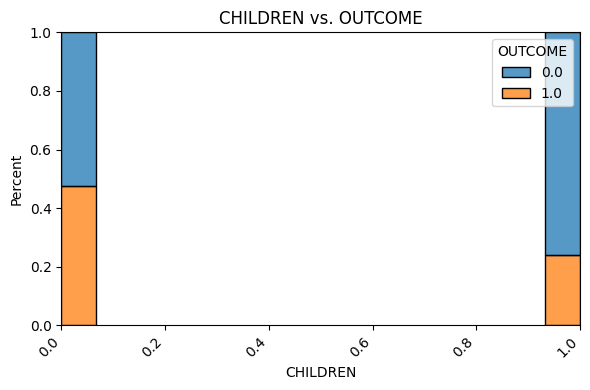

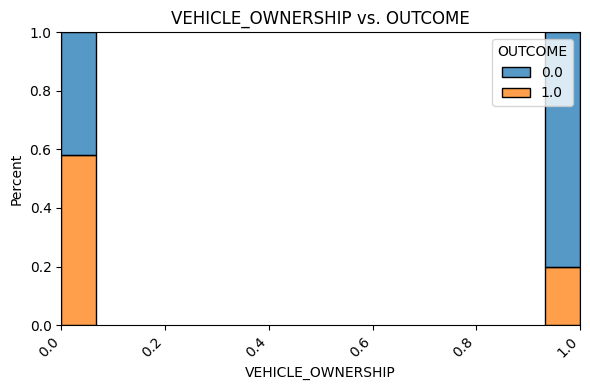

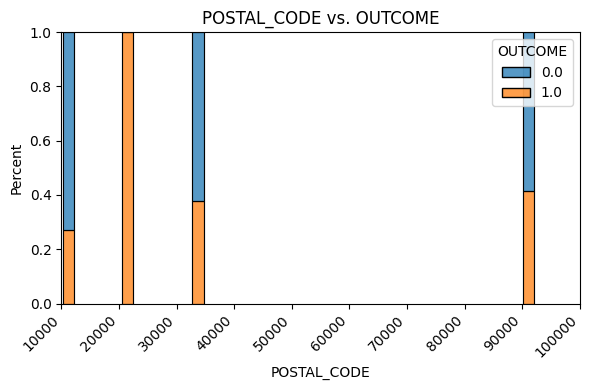

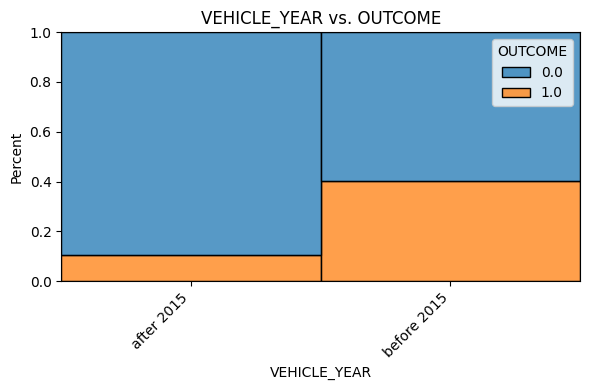

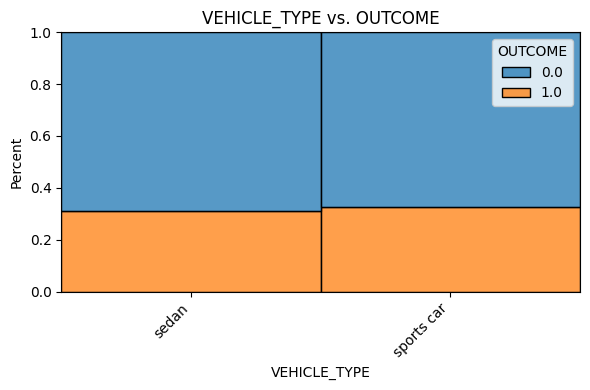

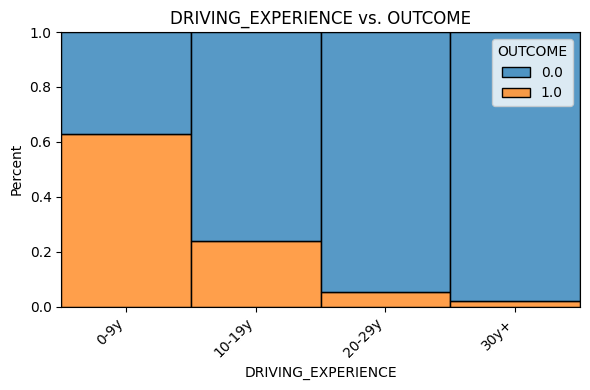

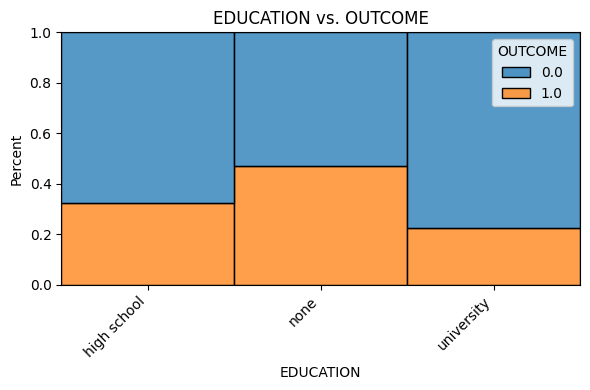

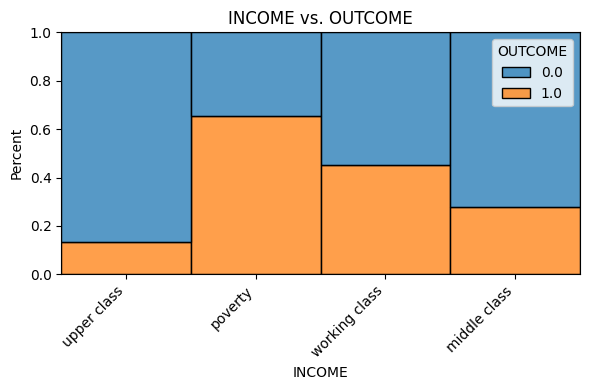

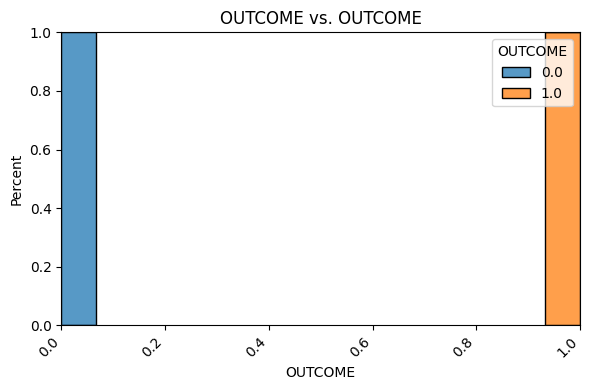

In [ ]:
for col in categorical_features:
  plot_categorical_vs_target(df,x=col,y='OUTCOME',target_type='class');

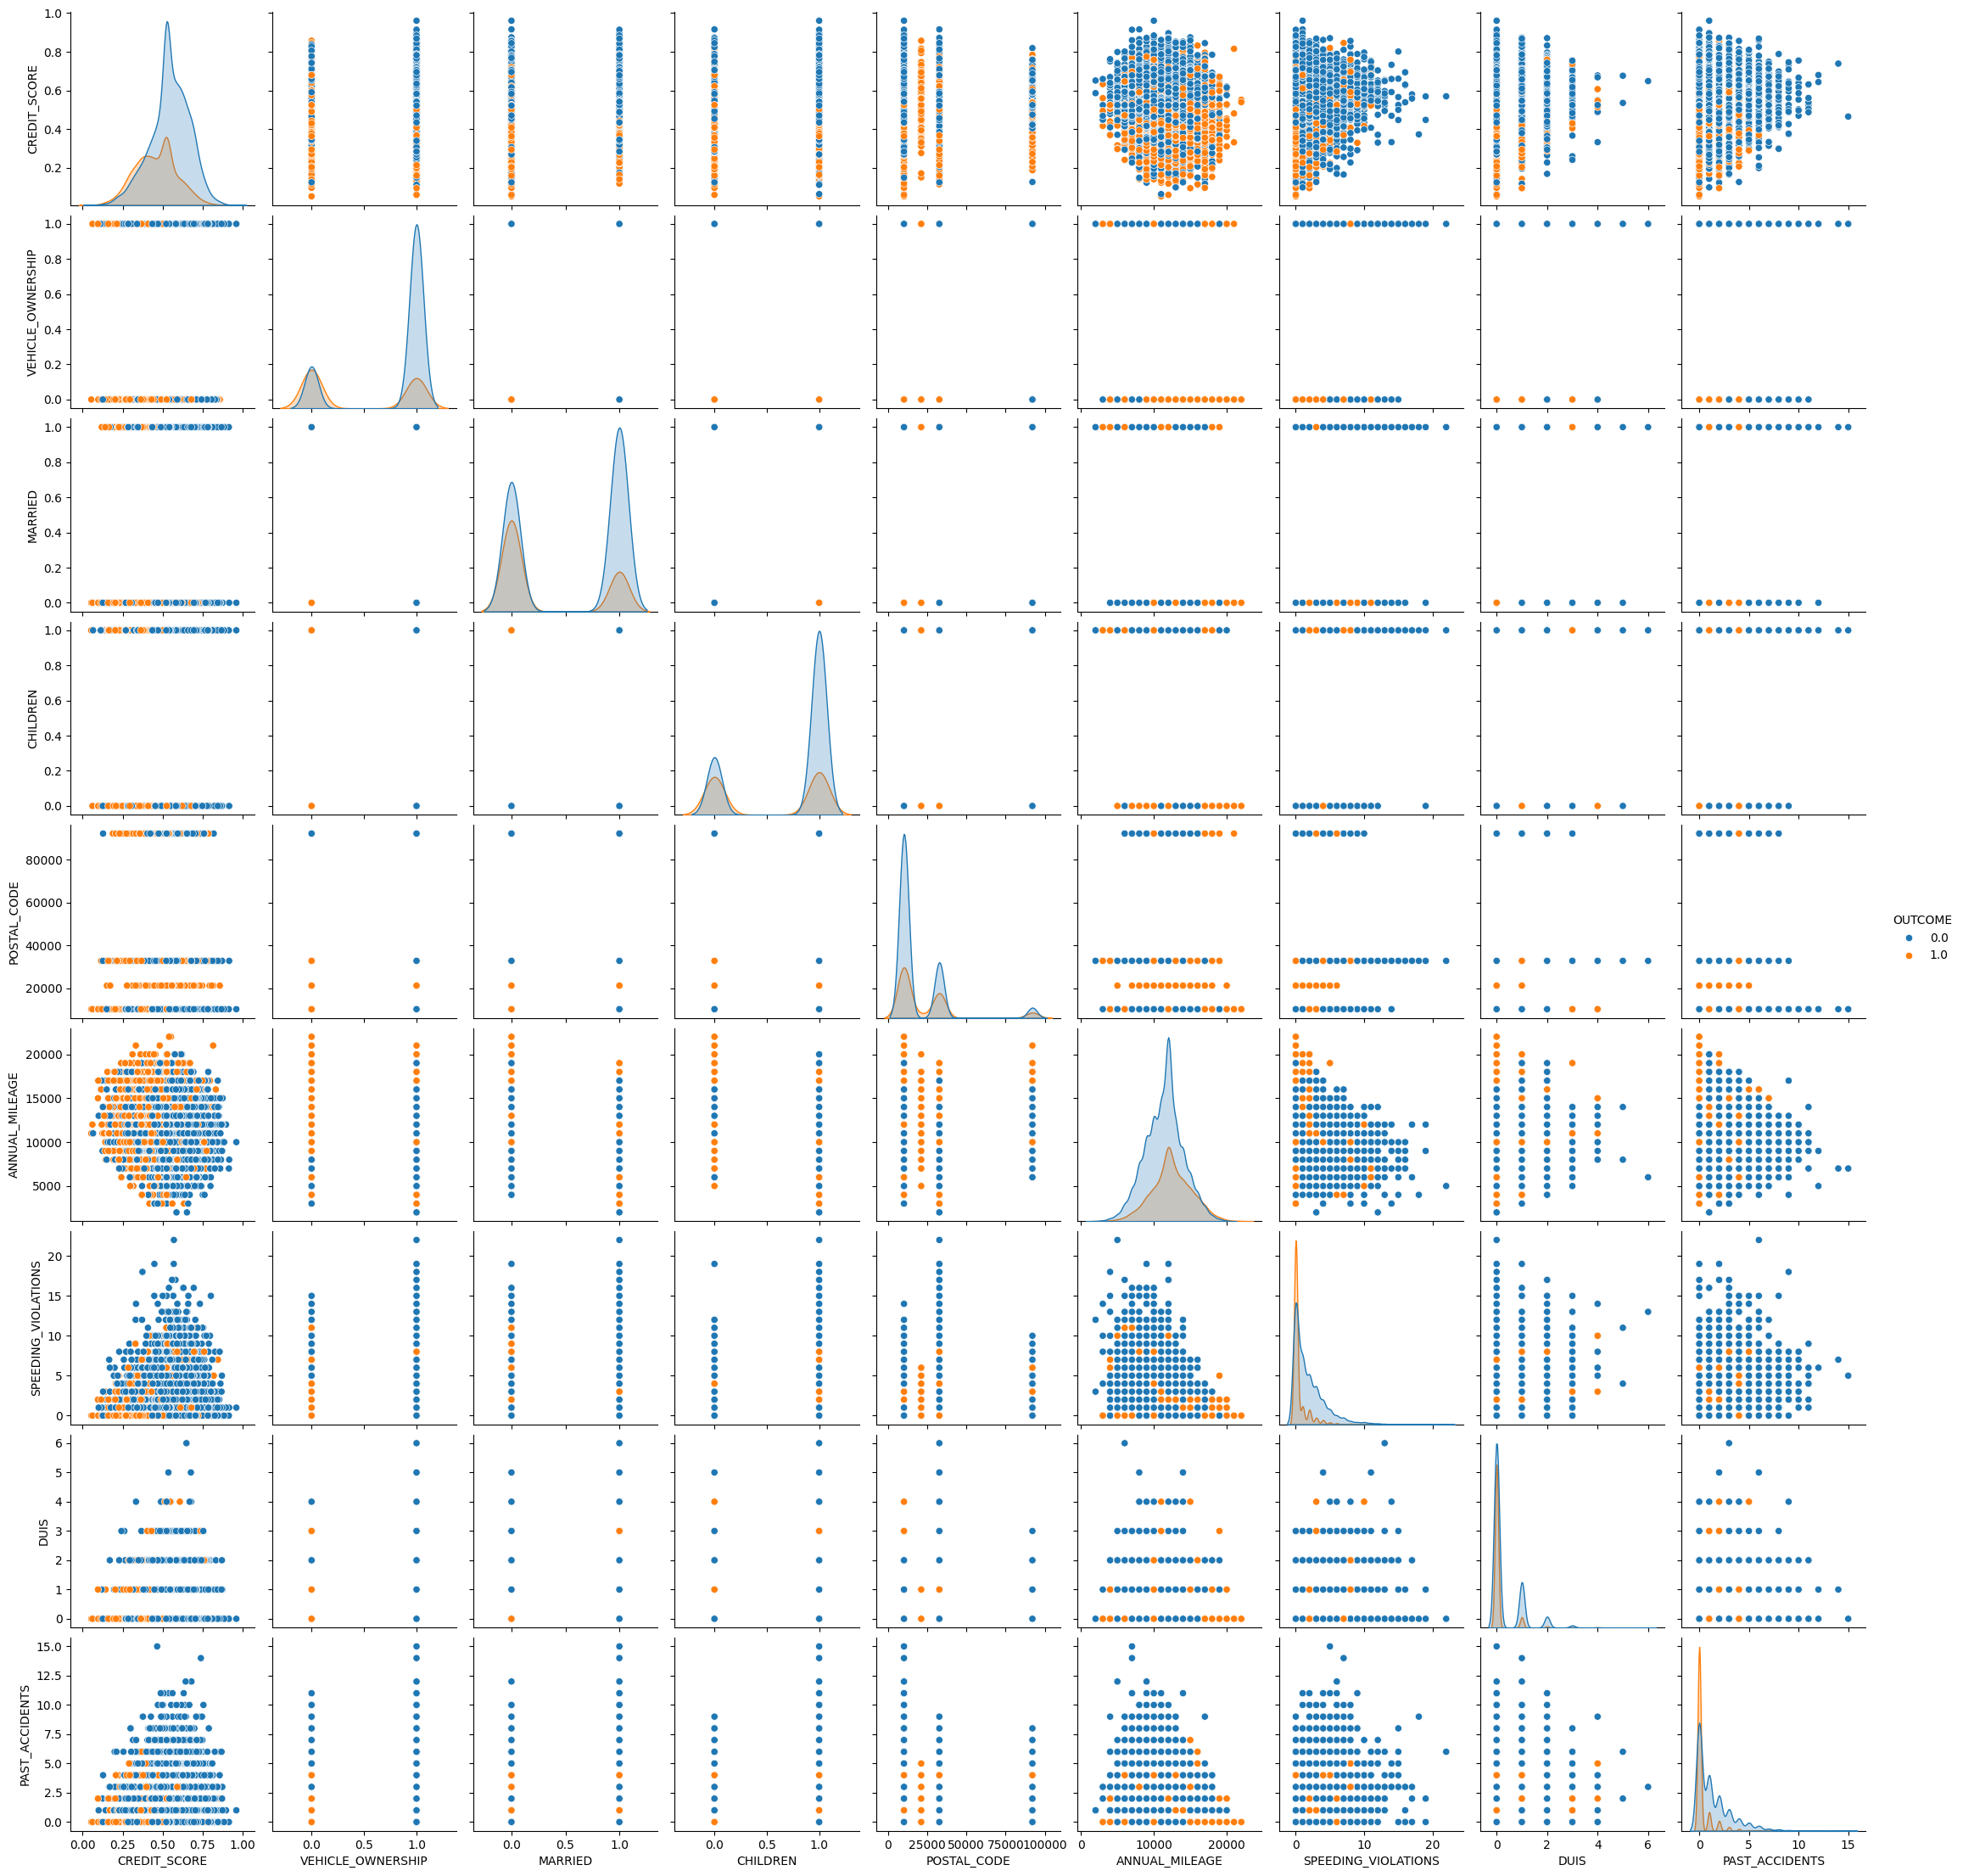

In [ ]:
sns.pairplot(df, hue='OUTCOME')

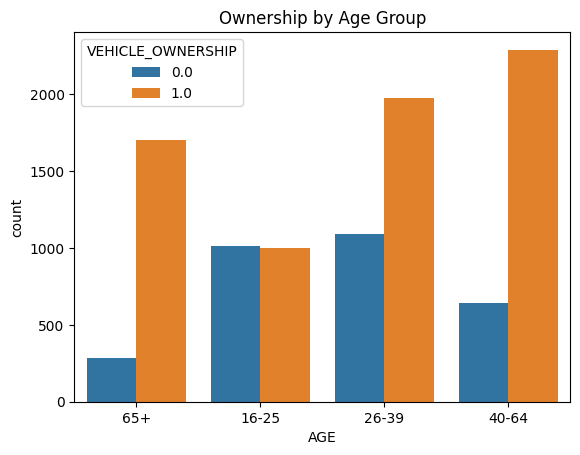

In [170]:
sns.countplot(data=df, x='AGE', hue='VEHICLE_OWNERSHIP')
plt.title("Ownership by Age Group")
plt.show()

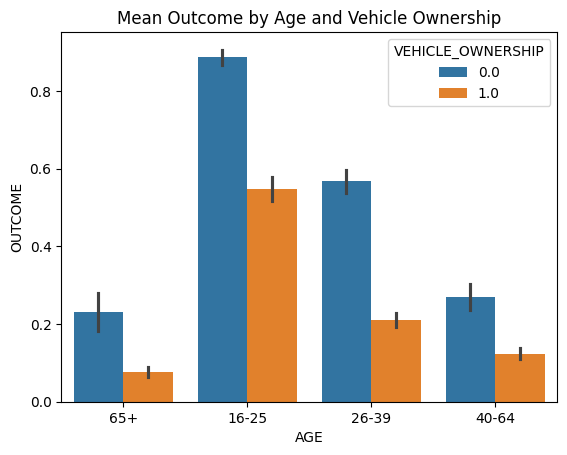

In [178]:
sns.barplot(df,x='AGE',y='OUTCOME' , hue='VEHICLE_OWNERSHIP')
plt.title('Mean Outcome by Age and Vehicle Ownership');

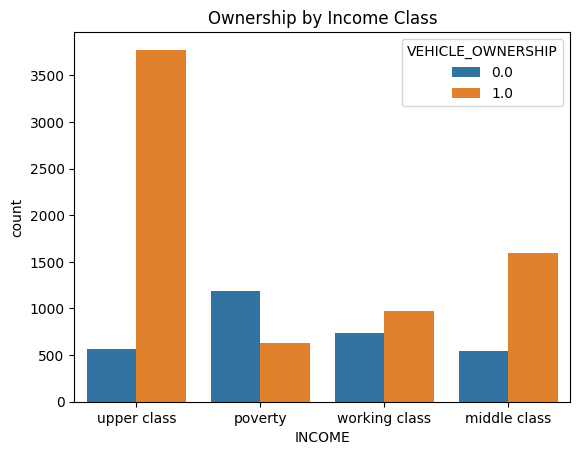

In [171]:
sns.countplot(data=df, x='INCOME', hue='VEHICLE_OWNERSHIP')
plt.title("Ownership by Income Class")
plt.show()

In [ ]:
corr = df.corr(numeric_only = True)
corr.round(2)

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
CREDIT_SCORE,1.00,0.30,0.27,0.21,0.01,-0.16,0.19,0.12,0.17,-0.31
VEHICLE_OWNERSHIP,0.30,1.00,0.18,0.13,-0.00,-0.09,0.13,0.09,0.12,-0.38
MARRIED,0.27,0.18,1.00,0.29,0.01,-0.44,0.22,0.12,0.22,-0.26
CHILDREN,0.21,0.13,0.29,1.00,0.02,-0.43,0.22,0.12,0.21,-0.23
POSTAL_CODE,0.01,-0.00,0.01,0.02,1.00,-0.13,0.11,0.04,-0.12,0.10
ANNUAL_MILEAGE,-0.16,-0.09,-0.44,-0.43,-0.13,1.00,-0.31,-0.11,-0.19,0.18
SPEEDING_VIOLATIONS,0.19,0.13,0.22,0.22,0.11,-0.31,1.00,0.36,0.44,-0.29
DUIS,0.12,0.09,0.12,0.12,0.04,-0.11,0.36,1.00,0.26,-0.19
PAST_ACCIDENTS,0.17,0.12,0.22,0.21,-0.12,-0.19,0.44,0.26,1.00,-0.31
OUTCOME,-0.31,-0.38,-0.26,-0.23,0.10,0.18,-0.29,-0.19,-0.31,1.00


<Axes: >

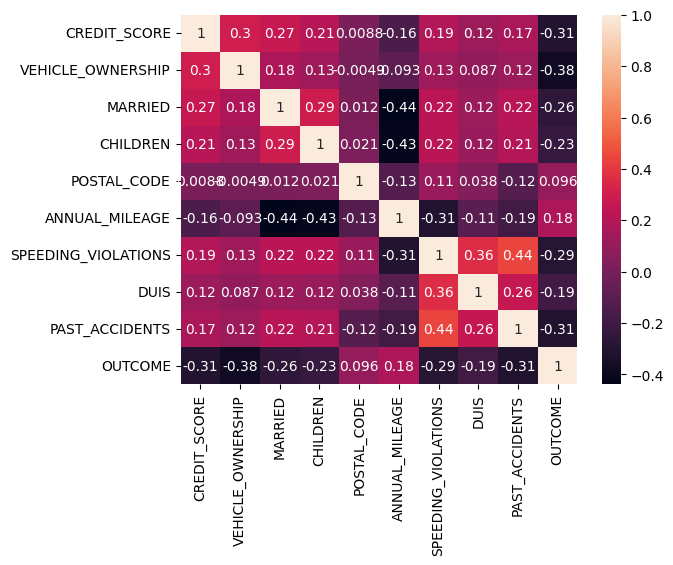

In [ ]:
sns.heatmap(corr,annot=True)

> - We will use the Random Forest model because the relationship between the features and the target is non-linear.

## Preprocesing for Machine Learning

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

### Defining X and y

In [ ]:
# Define features and target
y = df['OUTCOME']
X = df.drop(columns ='OUTCOME')
# Train Test split
X_train , X_test ,y_train ,y_test = train_test_split(X,y,random_state=42)
X_train.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
ID,,,,,,,,,,,,,,,,,
597605,40-64,male,majority,0-9y,high school,upper class,0.69,1.00,before 2015,1.00,1.00,92101,"12,000.00",sedan,0,0,0
208394,16-25,female,majority,0-9y,none,poverty,0.30,1.00,before 2015,0.00,0.00,32765,"12,000.00",sedan,0,0,0
318837,40-64,male,majority,10-19y,university,upper class,0.53,1.00,before 2015,1.00,1.00,10238,"12,000.00",sedan,0,0,3
559214,26-39,female,majority,10-19y,university,working class,0.45,1.00,before 2015,0.00,0.00,10238,"20,000.00",sedan,2,0,0
555274,16-25,female,majority,0-9y,none,poverty,0.15,1.00,before 2015,1.00,0.00,10238,"10,000.00",sedan,0,0,0


In [ ]:
y.value_counts()

,count
OUTCOME,
0.00,6867
1.00,3133


## Make pipeline

In [ ]:
# proprocessing pipeline for numeric columns
num_cols = X_train.select_dtypes('number').columns
num_cols=num_cols.delete([1,2,3,4])
print('Numeric Columns:' , num_cols)
# Instantiate propocessors
scaler = StandardScaler()
# make a numeric preprocessing pipeline
num_pipe = make_pipeline(scaler)
num_pipe

Numeric Columns: Index(['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')


Pipeline(steps=[('standardscaler', StandardScaler())])

In [ ]:
# Making a numeric tuple for columnsTransformer
num_tuple= ('numeric',num_pipe,num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('standardscaler', StandardScaler())]),
 Index(['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
        'PAST_ACCIDENTS'],
       dtype='object'))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 597605 to 480416
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  7500 non-null   object 
 1   GENDER               7500 non-null   object 
 2   RACE                 7500 non-null   object 
 3   DRIVING_EXPERIENCE   7500 non-null   object 
 4   EDUCATION            7500 non-null   object 
 5   INCOME               7500 non-null   object 
 6   CREDIT_SCORE         7500 non-null   float64
 7   VEHICLE_OWNERSHIP    7500 non-null   float64
 8   VEHICLE_YEAR         7500 non-null   object 
 9   MARRIED              7500 non-null   float64
 10  CHILDREN             7500 non-null   float64
 11  POSTAL_CODE          7500 non-null   int64  
 12  ANNUAL_MILEAGE       7500 non-null   float64
 13  VEHICLE_TYPE         7500 non-null   object 
 14  SPEEDING_VIOLATIONS  7500 non-null   int64  
 15  DUIS                 7500 non-null  

In [ ]:
X_train['AGE'].value_counts()

,count
AGE,
26-39,2286
40-64,2189
16-25,1517
65+,1508


In [ ]:
X_train['EDUCATION'].value_counts()

,count
EDUCATION,
high school,3082
university,2982
none,1436


In [ ]:
X_train['INCOME'].value_counts()

,count
INCOME,
upper class,3248
middle class,1629
poverty,1349
working class,1274


In [ ]:
# Preprocessing pipeline for ordinal data
# Save list of column names
ord_cols = ['EDUCATION','INCOME']
print('Ordinal Columns:' , ord_cols)
# Making the OrdinalEncoder
# Specifying order of categories for our ordinal columns
EDUCATION_ord = ['none','high school','university']
INCOME_ord = ['poverty','working class','middle class','upper class']
# Making the list of order list for ordianlencoder
ordinal_category_orders = [EDUCATION_ord,INCOME_ord]
ord_encoder = OrdinalEncoder(categories= ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
# Making a ord_pipe
ord_pipe = make_pipeline(ord_encoder,scaler_ord)
ord_pipe

Ordinal Columns: ['EDUCATION', 'INCOME']


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(categories=[['none', 'high school',
                                             'university'],
                                            ['poverty', 'working class',
                                             'middle class', 'upper class']])),
                ('standardscaler', StandardScaler())])

In [ ]:
# Making an ordinal_tuple for columnTransformer
ord_tuple = ('ordinal',ord_pipe , ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('ordinalencoder',
                  OrdinalEncoder(categories=[['none', 'high school',
                                              'university'],
                                             ['poverty', 'working class',
                                              'middle class', 'upper class']])),
                 ('standardscaler', StandardScaler())]),
 ['EDUCATION', 'INCOME'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 597605 to 480416
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  7500 non-null   object 
 1   GENDER               7500 non-null   object 
 2   RACE                 7500 non-null   object 
 3   DRIVING_EXPERIENCE   7500 non-null   object 
 4   EDUCATION            7500 non-null   object 
 5   INCOME               7500 non-null   object 
 6   CREDIT_SCORE         7500 non-null   float64
 7   VEHICLE_OWNERSHIP    7500 non-null   float64
 8   VEHICLE_YEAR         7500 non-null   object 
 9   MARRIED              7500 non-null   float64
 10  CHILDREN             7500 non-null   float64
 11  POSTAL_CODE          7500 non-null   int64  
 12  ANNUAL_MILEAGE       7500 non-null   float64
 13  VEHICLE_TYPE         7500 non-null   object 
 14  SPEEDING_VIOLATIONS  7500 non-null   int64  
 15  DUIS                 7500 non-null  

In [ ]:
# preprocessing pipeline for one-hot-encoded data
# save list of column names

ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
ohe_cols = list(ohe_cols)
num_ohe_cols = ['VEHICLE_OWNERSHIP','MARRIED','CHILDREN','POSTAL_CODE']
ohe_cols.extend(num_ohe_cols)
print('OneHotEncoder Columns : ', ohe_cols)
# Instantiate the individual preprocessors
ohe_encoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(ohe_encoder)
ohe_pipe

OneHotEncoder Columns :  ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_YEAR', 'VEHICLE_TYPE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE']


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
ohe_tuple = ('categorical' ,ohe_pipe,ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 ['AGE',
  'GENDER',
  'RACE',
  'DRIVING_EXPERIENCE',
  'VEHICLE_YEAR',
  'VEHICLE_TYPE',
  'VEHICLE_OWNERSHIP',
  'MARRIED',
  'CHILDREN',
  'POSTAL_CODE'])

> -
I used OrdinalEncoder for the features Education and Income because their categories are ordered, and each higher category represents a greater level of importance.
On the other hand, I used OneHotEncoder for the features 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_YEAR', 'VEHICLE_TYPE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', and 'POSTAL_CODE' because these features are non-ordinal — we cannot say that people over 60 are more important than those aged 16–25, and similarly, we cannot assign more importance to one gender over the other.
The same logic was applied to the remaining non-ordinal features as well.

In [ ]:
preprocessor = ColumnTransformer([num_tuple,ord_tuple,ohe_tuple],verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index(['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['none',
                                                                              'high '
                                                                              'school',
                                                                              'university'],
                                                                             ['poverty',
                                                                              'working '
                                                                              'class',
                                                                              'middle '
                                                                              'class',
                                                                              'upper '
                                                                              'class']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['EDUCATION', 'INCOME']),
                                ('categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE',
                                  'VEHICLE_YEAR', 'VEHICLE_TYPE',
                                  'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
                                  'POSTAL_CODE'])],
                  verbose_feature_names_out=False)

## Modeling

### RandomForest Model

In [151]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label="",
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [155]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
# Instantiate a Random Forest model
rf = RandomForestClassifier(random_state=42)
# Make a Smote to fix the unbalanced data
smote = SMOTE()
# Make a pipe line
rf_pipe = make_sampler_pipeline(preprocessor,smote,rf)
# Fit the model to training data
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['none',
                                                                                               'high '
                                                                                               'school',
                                                                                               'university'],
                                                                                              ['po...
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['AGE', 'GENDER', 'RACE',
                                                   'DRIVING_EXPERIENCE',
                                                   'VEHICLE_YEAR',
                                                   'VEHICLE_TYPE',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN',
                                                   'POSTAL_CODE'])],
                                   verbose_feature_names_out=False)),
                ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5144
         1.0       1.00      1.00      1.00      2356

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500



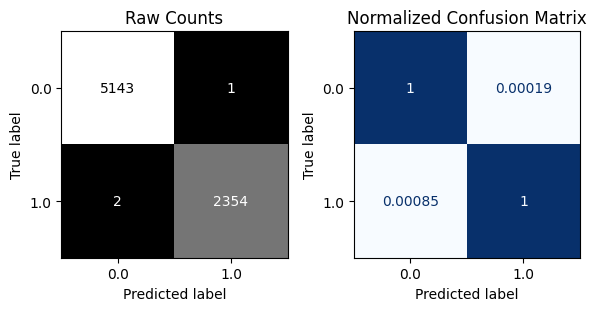


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      1723
         1.0       0.75      0.73      0.74       777

    accuracy                           0.84      2500
   macro avg       0.82      0.81      0.81      2500
weighted avg       0.84      0.84      0.84      2500



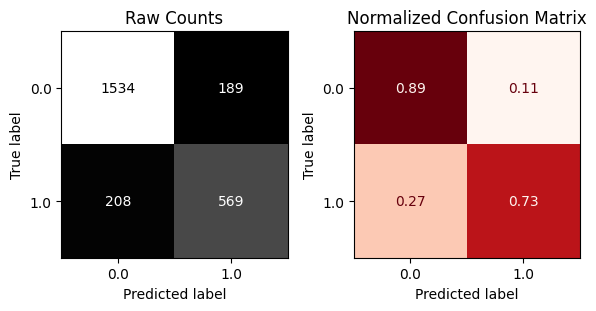

In [156]:
evaluate_classification(rf_pipe,X_train,y_train,X_test,y_test)

In [157]:
from sklearn.inspection import permutation_importance
# Permutation importance takes a fit model and the test data.
r = permutation_importance(rf_pipe, X_test, y_test,n_repeats =5, random_state = 42)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [159]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

,permutation importance
DRIVING_EXPERIENCE,0.07
VEHICLE_OWNERSHIP,0.05
VEHICLE_YEAR,0.05
POSTAL_CODE,0.02
GENDER,0.02
MARRIED,0.00
PAST_ACCIDENTS,0.00
CREDIT_SCORE,0.00
VEHICLE_TYPE,0.00
RACE,0.00


In [160]:
def plot_importance(importances,top_n=None,figsize =(8,6)):
  # Sorting with asc=false for correct order of bars
  if top_n == None:
    # Sort all features and set title
    plot_vals = importances.sort_values()
    title = "All Features - Ranked by Importance"
  else :
    ## Sort features and keep top_n and set title
    plot_vals = importances.sort_values().tail(top_n)
    title = f"Top {top_n} Most Important Features"
  ## Plotting top N importances
  ax = plot_vals.plot(kind='barh',figsize=figsize)
  ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
  ## return ax in case want to continue to update/modify figure
  return ax

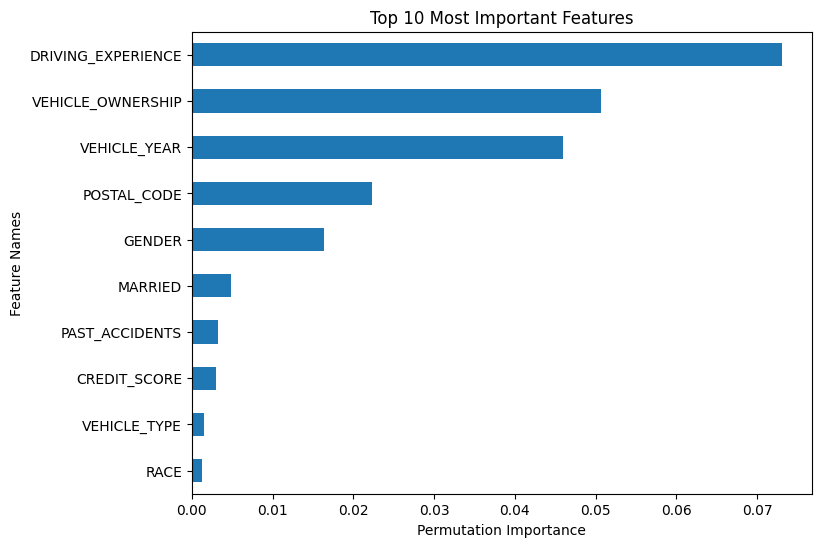

In [166]:
ax = plot_importance(permutation_importances,top_n=10)
ax.set(xlabel='Permutation Importance');

> Do these features make sense based on the business case?
  - DRIVING_EXPERIENCE = 0.07
This feature has the highest importance, which makes perfect sense.
	  -	People with less driving experience are more likely to be involved in accidents and therefore more likely to file a claim.
	  -	This finding is consistent with the patterns observed in the data.
  - VEHICLE_OWNERSHIP = 0.05
This feature has a relatively high importance, and this is quite logical.
	  - Young individuals aged 16–25 who do not own a vehicle typically have limited driving experience,
	  - As a result, they have a higher risk of being involved in traffic accidents, and are therefore more likely to file a claim.
	  - This aligns well with our earlier observations from the data.
  - VEHICLE_YEAR = 0.05
This feature also shows a reasonable level of importance, which is logical.
	  -	Older vehicles are more prone to mechanical failures, accidents, or even theft,
	  - Which increases the likelihood of filing an insurance claim.



##  Explanatory Visualizations for the most important features

### DRIVING_EXPERIENCE

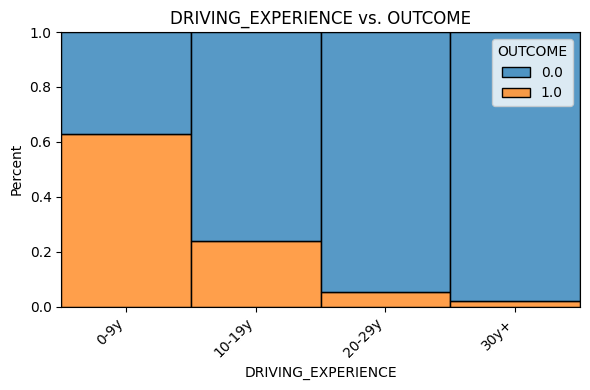

In [182]:
plot_categorical_vs_target(df,x='DRIVING_EXPERIENCE',y='OUTCOME',target_type='class');

- DRIVING_EXPERIENCE Based on the DRIVING_EXPERIENCE vs OUTCOME chart:

	 - Individuals with 0–9 years of driving experience account for about 60% of insurance claims.

  - This is logical, as drivers with less experience are more likely to beinvolved in accidents, which increases the likelihood of filing a claim.

  - However, as driving experience increases, the claim rate decreases,
  because more experienced drivers tend to have better driving skills and lower accident risk.

### VEHICLE_YEAR

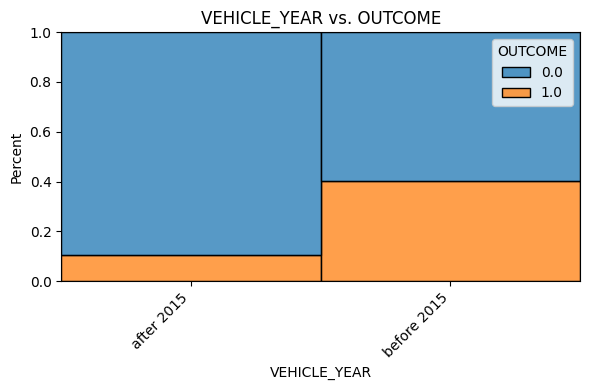

In [185]:
plot_categorical_vs_target(df,x='VEHICLE_YEAR',y='OUTCOME',target_type='class');

- VEHICLE_YEAR Based on the VEHICLE_YEAR vs OUTCOME chart:
	-	Vehicles manufactured before 2015 have the highest insurance claim rate, with 40% of them having filed a claim.
  
	-	This is logical, as older vehicles are more prone to mechanical issues, breakdowns, or accidents,
which naturally leads to a higher likelihood of filing an insurance claim
